In [ ]:
# 1a
import numpy as np

center = 7.25
standardDeviation = 0.5
gs = np.random.normal(center, standardDeviation, 10000)


We use numpy and import random to be able to create a normal distribution of the glove size given the center of the sizes being 7.5 and the standard deviation being 0.5

Text(0.5, 1.0, 'ptime')

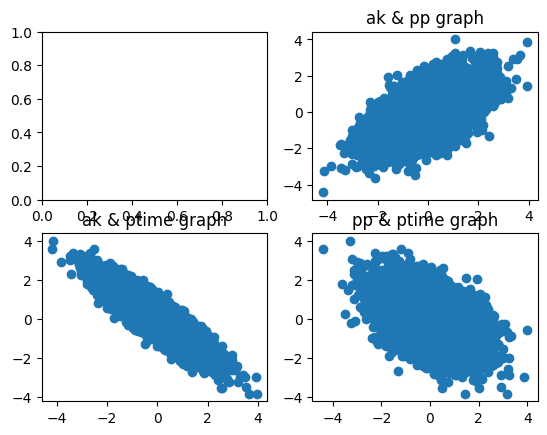

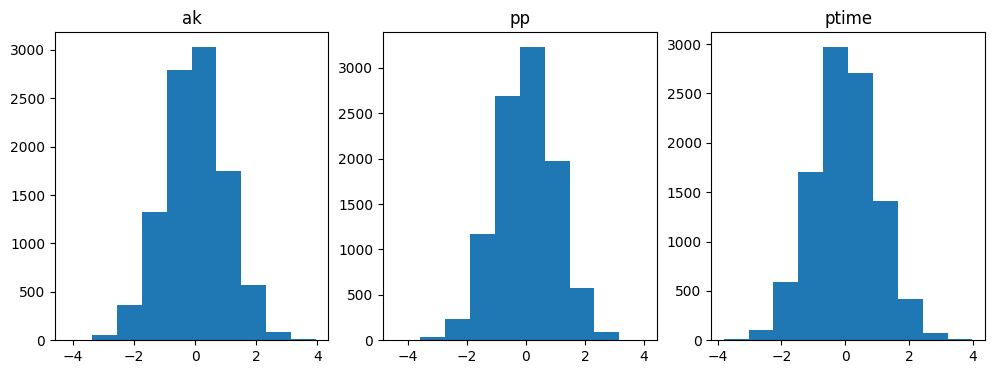

In [ ]:
# 1b
import matplotlib.pyplot as plt

mean = [0, 0, 0]
sigma = covMatrix = [
    [1.0, 0.6, -0.9],
    [0.6, 1.0, -0.5],
    [-0.9, -0.5, 1.0]
]

mvNormal = np.random.multivariate_normal(mean, sigma, 10000)

ak = mvNormal[:, 0]
pp = mvNormal[:, 1]
ptime = mvNormal[:, 2]

figure, axis = plt.subplots(2, 2)

axis[0, 1].scatter(ak, pp)
axis[0, 1].set_title("ak & pp graph")

axis[1, 0].scatter(ak, ptime)
axis[1, 0].set_title("ak & ptime graph")

axis[1, 1].scatter(pp, ptime)
axis[1, 1].set_title("pp & ptime graph")

plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.hist(ak)
plt.title('ak')
plt.subplot(132)
plt.hist(pp)
plt.title('pp')
plt.subplot(133)
plt.hist(ptime)
plt.title('ptime')


Given that the sample size is 10,000 I need to create a multivariable normal distribtion of that size. Because we are simulating the results, sigma/covMatrix is what we want the mvNormal to look like. I then extract the data from each variable from each column in mvNormal.

Text(0.5, 1.0, 'pp & ptime graph')

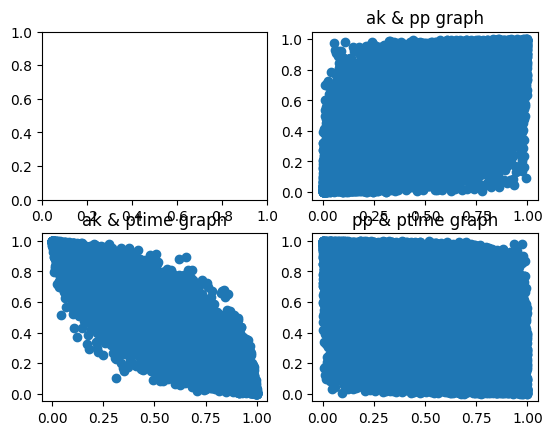

In [ ]:
# 1c
import scipy as sp
from scipy.stats import norm

akPIT = norm.cdf(ak)
ppPIT = norm.cdf(pp)
ptimePIT = norm.cdf(ptime)

figure, axis = plt.subplots(2, 2)

axis[0, 1].scatter(akPIT, ppPIT)
axis[0, 1].set_title("ak & pp graph")

axis[1, 0].scatter(akPIT, ptimePIT)
axis[1, 0].set_title("ak & ptime graph")

axis[1, 1].scatter(ppPIT, ptimePIT)
axis[1, 1].set_title("pp & ptime graph")


I import norm from scipy.stats so I can get access to the cdf function. Then I just take the cdf of each variable and plot them in a scatter plot

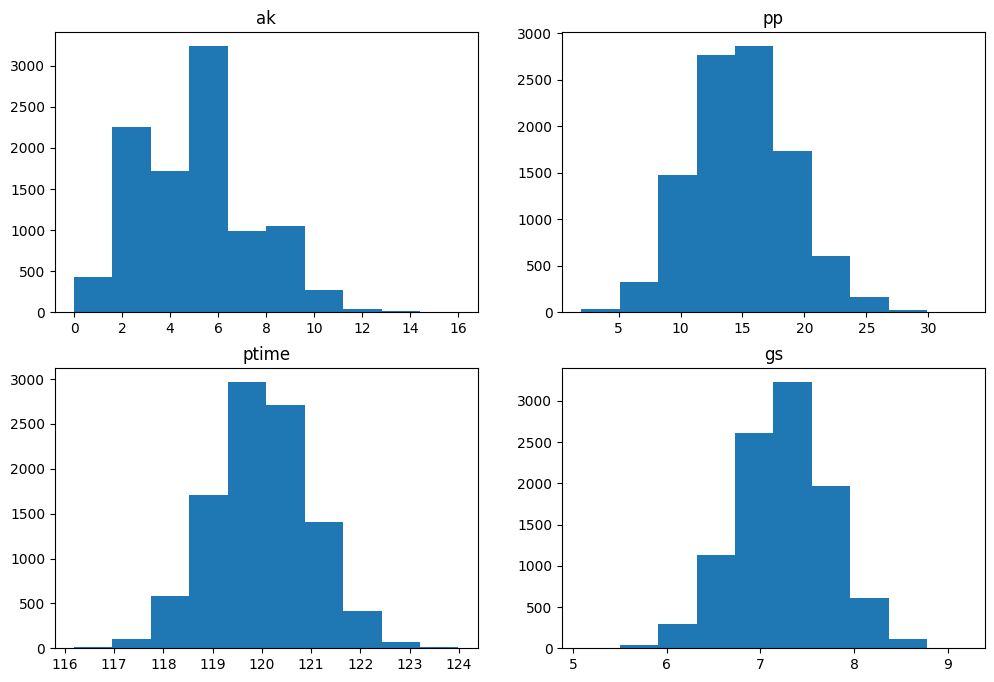

In [ ]:
# 1d
from scipy.stats import norm
from scipy.stats import poisson

akInverse = poisson.ppf(akPIT, 5)
ppInverse = poisson.ppf(ppPIT, 15)
ptimeInverse = norm.ppf(ptimePIT, 120)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(akInverse)
plt.title('ak')
plt.subplot(2, 2, 2)
plt.hist(ppInverse)
plt.title('pp')
plt.subplot(2, 2, 3)
plt.hist(ptimeInverse)
plt.title('ptime')
plt.subplot(2, 2, 4)
plt.hist(gs)
plt.title('gs')
plt.show()


I import norm and poisson from scipy.stats as they are the inverse of the cdf. I take the inverse of the probabilty integral transformation of each variable except gs because gs is independent. I then create a histogram of each variable.

ak and pp correlation: 0.5811305058084908
ak and ptime correletaion: -0.8877270629368126
pp and ptime correlation: -0.4873220560974984
gs and ptime correlation: -0.00471666734047866
gs and pp correlation: -0.0002575573012753187
gs and ak correlation: 0.004104935195045357


Text(0.5, 1.0, 'ptime & gs graph')

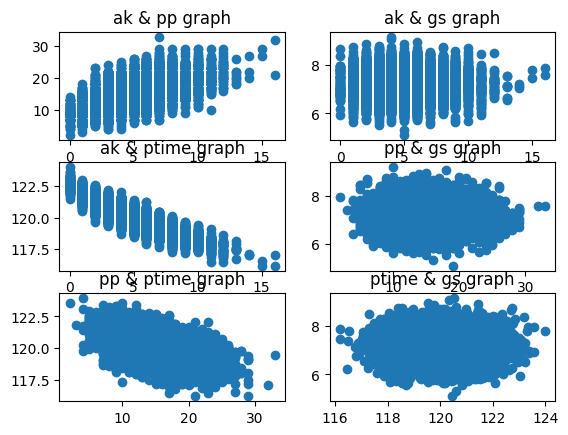

In [ ]:
# 1e
import pandas as pd

akNew = pd.Series(akInverse)
ptimeNew = pd.Series(ptimeInverse)
ppNew = pd.Series(ppInverse )
gsNew = pd.Series(gs)

print("ak and pp correlation:", akNew.corr(ppNew))
print("ak and ptime correletaion:", akNew.corr(ptimeNew))
print("pp and ptime correlation:", ppNew.corr(ptimeNew))
print("gs and ptime correlation:", gsNew.corr(ptimeNew))
print("gs and pp correlation:", gsNew.corr(ppNew))
print("gs and ak correlation:", gsNew.corr(akNew))

figure, axis = plt.subplots(3, 2)

axis[0, 0].scatter(akNew, ppNew)
axis[0, 0].set_title("ak & pp graph")

axis[1, 0].scatter(akNew, ptimeNew)
axis[1, 0].set_title("ak & ptime graph")

axis[2, 0].scatter(ppNew, ptimeNew)
axis[2, 0].set_title("pp & ptime graph")

axis[0, 1].scatter(akNew, gsNew)
axis[0, 1].set_title("ak & gs graph")

axis[1, 1].scatter(ppNew, gsNew)
axis[1 ,1].set_title("pp & gs graph")

axis[2, 1].scatter(ptimeNew, gsNew)
axis[2, 1].set_title("ptime & gs graph")

I create a series for each variable so I can use the corr() function from pandas library so I can compare the correlation of each variable. I then plot the correlation of each variable in a scatter plot